# This is an iPython Jupyter Notebook to let us look at some of the data we collected in class on 2022-09-26


## Import the python packages we'll need

In [103]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
%matplotlib inline

## Get the paths to the files and data we'll need

In [105]:
# folders and stuff
from tkinter import *
from tkinter import filedialog

root = Tk()
root.withdraw()

# Open a tkinter file dialog to select the session id folder you want to analyze
session_folder_path = filedialog.askdirectory(title="Select The Desired Session ID Folder")
session_folder_path = Path(session_folder_path)
print(session_folder_path)
data_arrays_path = session_folder_path / 'DataArrays'
print("The path to the data arrays is:", data_arrays_path)


/Users/sabrasisler/Desktop/Matthis/Data/ClassData/sesh_2022-09-28_15_45_39
The path to the data arrays is: /Users/sabrasisler/Desktop/Matthis/Data/ClassData/sesh_2022-09-28_15_45_39/DataArrays


In [106]:
#Specific file paths
com_xyz_npy_path = data_arrays_path / "totalBodyCOM_frame_XYZ.npy"
skeleton_body_dots_csv_path = data_arrays_path / "mediapipe_body_3d_xyz.csv"


In [107]:
# load the data in

com_xyz = np.load(com_xyz_npy_path)
skeleton_dataframe = pd.read_csv(skeleton_body_dots_csv_path)

In [108]:
# Examples of how to access elements of the data array
nose_x = skeleton_dataframe["nose_x"]
nose_y = skeleton_dataframe["nose_y"]
nose_z = skeleton_dataframe["nose_z"]

print(f"nose_x.shape: {nose_x.shape}")

nose_x.shape: (6980,)


In [110]:
# This function plots a time series plot of a given body part
def plotXYZOverTime(column1, column2, column3, object, colors):

    xdata = skeleton_dataframe[column1]
    ydata = skeleton_dataframe[column2]
    zdata = skeleton_dataframe[column3]


    plt1 = plt.plot(xdata, color=colors[0])
    plot2 = plt.plot(ydata, color=colors[1])
    plot3 = plt.plot(zdata, color=colors[2])
    plt.title("Position of " + object + " Over Time")
    plt.xlabel("Frame Number")
    plt.ylabel("Value")
    plt.legend([object + " X", object + " Y", object+ "Z"])
    plt.show()

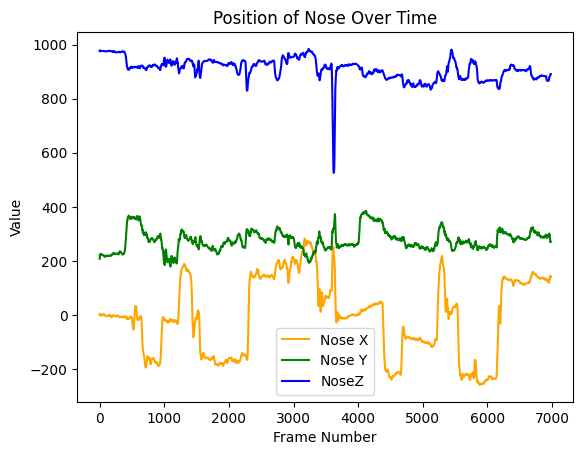

In [111]:
# To change the color of the lines on the plot, change these three variables
colors = ["orange", "green", "blue"]

# produces a simple plot of `com_xyz` time series of nose
plotXYZOverTime("nose_x", "nose_y", "nose_z", "Nose", colors)



In [112]:
right_toe_x = skeleton_dataframe["right_foot_index_x"]
right_toe_y = skeleton_dataframe["right_foot_index_y"]
right_toe_z = skeleton_dataframe["right_foot_index_z"]

right_heel_x = skeleton_dataframe["right_heel_x"]
right_heel_y = skeleton_dataframe["right_heel_y"]
right_heel_z = skeleton_dataframe["right_heel_z"]


cx = com_xyz[np.arange(2500,3500),0]
cy = com_xyz[np.arange(2500,3500),1]



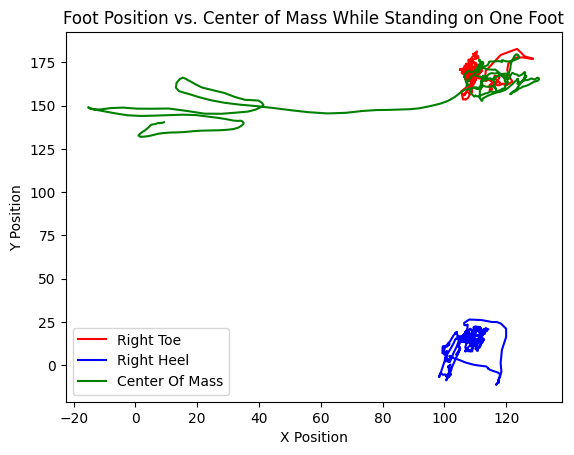

In [113]:
#Change the frame numbers for an area of interest
startFrame = 2500
endFrame = 3500


fig2 = plt.Figure()

plt.plot(right_toe_x[startFrame:endFrame], right_toe_y[startFrame:endFrame], 'r')
plt.plot(right_heel_x[startFrame:endFrame], right_heel_y[startFrame:endFrame], 'b')
plt.plot(cx, cy, 'g')
plt.title("Foot Position vs. Center of Mass While Standing on One Foot")
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.legend(["Right Toe", "Right Heel", "Center Of Mass"])
plt.show()

In [166]:
#This function creates two subplots with the first showing location of foot vs cetner of mass while holding a weight, second without holding weight

def plotWithandWithoutWeight(startFrameNoWeight, endFrameNoWeight, startFrameWithWeight, endFrameWithWeight, onefoot=True, foot="right"):
    #extract the data from the data frame
    right_toe_x = skeleton_dataframe["right_foot_index_x"]
    right_toe_y = skeleton_dataframe["right_foot_index_y"]
    right_toe_z = skeleton_dataframe["right_foot_index_z"]

    right_heel_x = skeleton_dataframe["right_heel_x"]
    right_heel_y = skeleton_dataframe["right_heel_y"]
    right_heel_z = skeleton_dataframe["right_heel_z"]

    left_toe_x = skeleton_dataframe["left_foot_index_x"]
    left_toe_y = skeleton_dataframe["left_foot_index_y"]
    left_toe_z = skeleton_dataframe["left_foot_index_z"]

    left_heel_x = skeleton_dataframe["left_heel_x"]
    left_heel_y = skeleton_dataframe["left_heel_y"]
    left_heel_z = skeleton_dataframe["left_heel_z"]

    cxWeight = com_xyz[np.arange(startFrameWithWeight,endFrameWithWeight),0]
    cyWeight = com_xyz[np.arange(startFrameWithWeight,endFrameWithWeight),1]
    
    cxNoWeight = com_xyz[np.arange(startFrameNoWeight,endFrameNoWeight),0]
    cyNoWeight = com_xyz[np.arange(startFrameNoWeight,endFrameNoWeight),1]


    #Create the plots
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, constrained_layout=True)
    fig.suptitle('Foot Postition vs. Center of Mass', fontsize=16)

    if (onefoot==False or (onefoot and foot=="right")):
        ax2.plot(right_toe_x[startFrameWithWeight:endFrameWithWeight], right_toe_y[startFrameWithWeight:endFrameWithWeight], 'r')
        ax2.plot(right_heel_x[startFrameWithWeight:endFrameWithWeight], right_heel_y[startFrameWithWeight:endFrameWithWeight], 'b')
        ax1.plot(right_toe_x[startFrameNoWeight:endFrameNoWeight], right_toe_y[startFrameNoWeight:endFrameNoWeight], 'r')
        ax1.plot(right_heel_x[startFrameNoWeight:endFrameNoWeight], right_heel_y[startFrameNoWeight:endFrameNoWeight], 'b')
    
    if (onefoot==False or (onefoot and foot=="left")):
        ax2.plot(left_toe_x[startFrameWithWeight:endFrameWithWeight], left_toe_y[startFrameWithWeight:endFrameWithWeight], 'orange')
        ax2.plot(left_heel_x[startFrameWithWeight:endFrameWithWeight], left_heel_y[startFrameWithWeight:endFrameWithWeight], 'purple')
        ax1.plot(left_toe_x[startFrameNoWeight:endFrameNoWeight], left_toe_y[startFrameNoWeight:endFrameNoWeight], 'orange')
        ax1.plot(left_heel_x[startFrameNoWeight:endFrameNoWeight], left_heel_y[startFrameNoWeight:endFrameNoWeight], 'purple')
    
    ax1.plot(cxNoWeight, cyNoWeight, 'g')
    ax2.plot(cxWeight, cyWeight, 'g')

    ax2.set_title('With Weight', fontsize=14)
    ax1.set_title("Without Weight", fontsize=14)

    ax1.set_xlabel(xlabel='X Position', fontsize=12)
    ax1.set_ylabel('Y Position', fontsize=12)
    ax2.set_xlabel("X Position", fontsize=12)
    ax1.set_aspect("equal")
    ax2.set_aspect("equal")

    if(onefoot):
        plt.legend(["Toe", "Heel", "Center Of Mass"])
    else:
        plt.legend(["Left Toe", "Left Heel", "Right Toe", "Right Heel", "Center Of Mass"])
    plt.show()

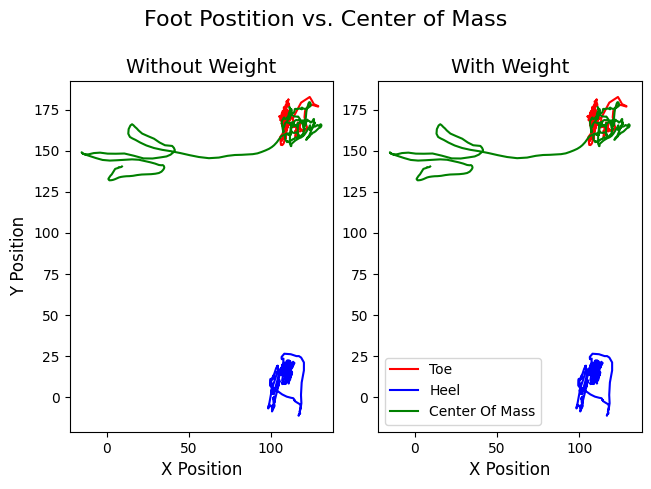

In [167]:
# Change these to the desired frame numbers for when participants are standing on right foot with/without weight
startFrameWithWeight = 2500
endFrameWithWeight = 3500
startFrameNoWeight = 2500
endFrameNoWeight = 3500


# Plot weight vs no weight right foot
plotWithandWithoutWeight(startFrameNoWeight, endFrameNoWeight, startFrameWithWeight, endFrameWithWeight, onefoot=True, foot="right")

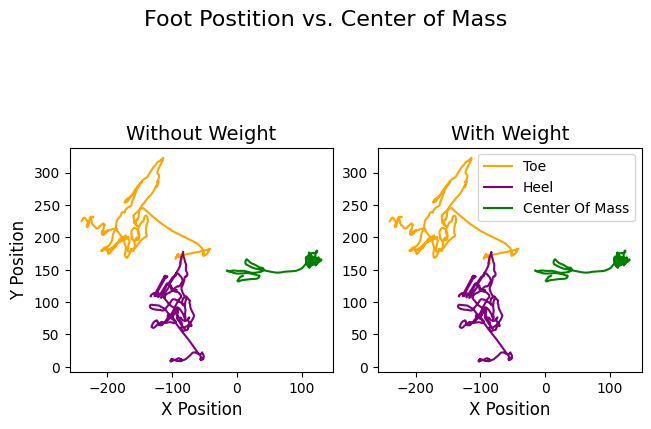

In [168]:
# Change these to the desired frame numbers for when participants are standing on left foot with/without weight
startFrameWithWeight = 2500
endFrameWithWeight = 3500
startFrameNoWeight = 2500
endFrameNoWeight = 3500

#Plot weight vs no weight left foot
plotWithandWithoutWeight(startFrameNoWeight, endFrameNoWeight, startFrameWithWeight, endFrameWithWeight, onefoot=True, foot="left")

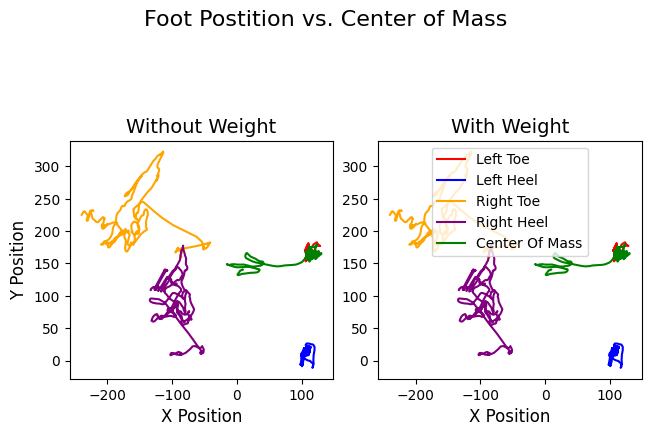

In [169]:
# Change these to the desired frame numbers for when participants are standing on both feet with/without weight
startFrameWithWeight = 2500
endFrameWithWeight = 3500
startFrameNoWeight = 2500
endFrameNoWeight = 3500

#Plot weight vs no weight both
plotWithandWithoutWeight(startFrameNoWeight, endFrameNoWeight, startFrameWithWeight, endFrameWithWeight, onefoot=False)

In [157]:
#This function creates two subplots with the first showing location of foot vs cetner of mass while holding a weight, second without holding weight
def plotOneVsTwoFeet(startFrameOneFoot, endFrameOneFoot, startFrameTwoFeet, endFrameTwoFeet, colors, weight=False):
    #extract the data from the data frame
    right_toe_x = skeleton_dataframe["right_foot_index_x"]
    right_toe_y = skeleton_dataframe["right_foot_index_y"]
    right_toe_z = skeleton_dataframe["right_foot_index_z"]

    right_heel_x = skeleton_dataframe["right_heel_x"]
    right_heel_y = skeleton_dataframe["right_heel_y"]
    right_heel_z = skeleton_dataframe["right_heel_z"]

    left_toe_x = skeleton_dataframe["left_foot_index_x"]
    left_toe_y = skeleton_dataframe["left_foot_index_y"]
    left_toe_z = skeleton_dataframe["left_foot_index_z"]

    left_heel_x = skeleton_dataframe["left_heel_x"]
    left_heel_y = skeleton_dataframe["left_heel_y"]
    left_heel_z = skeleton_dataframe["left_heel_z"]

    cxTwoFeet = com_xyz[np.arange(startFrameOneFoot,endFrameOneFoot),0]
    cyTwoFeet = com_xyz[np.arange(startFrameOneFoot,endFrameOneFoot),1]
    
    cxOneFoot = com_xyz[np.arange(startFrameTwoFeet,endFrameTwoFeet),0]
    cyOneFoot = com_xyz[np.arange(startFrameTwoFeet,endFrameTwoFeet),1]


    #Create the plots
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, constrained_layout=True)
    fig.suptitle('Foot Position vs. Center of Mass', fontsize=16)

    #Plot one foot
    ax1.plot(right_toe_x[startFrameOneFoot:endFrameOneFoot], right_toe_y[startFrameOneFoot:endFrameOneFoot], colors[1])
    ax1.plot(right_heel_x[startFrameOneFoot:endFrameOneFoot], right_heel_y[startFrameOneFoot:endFrameOneFoot], colors[2])
    ax1.plot(cxOneFoot, cyOneFoot, colors[0])
    
    #Plot both feet
    ax2.plot(left_toe_x[startFrameTwoFeet:endFrameTwoFeet], left_toe_y[startFrameTwoFeet:endFrameTwoFeet], colors[1])
    ax2.plot(left_heel_x[startFrameTwoFeet:endFrameTwoFeet], left_heel_y[startFrameTwoFeet:endFrameTwoFeet], colors[2])
    ax2.plot(cxTwoFeet, cyTwoFeet, colors[0])
    ax2.plot(right_toe_x[startFrameTwoFeet:endFrameTwoFeet], right_toe_y[startFrameTwoFeet:endFrameTwoFeet], colors[1])
    ax2.plot(right_heel_x[startFrameTwoFeet:endFrameTwoFeet], right_heel_y[startFrameTwoFeet:endFrameTwoFeet], colors[2])
   


    ax2.set_title('Both Feet', fontsize=14)
    ax1.set_title("One Foot", fontsize=14)

    ax1.set_xlabel(xlabel='X Position', fontsize=12)
    ax1.set_ylabel('Y Position', fontsize=12)
    ax2.set_xlabel("X Position", fontsize=12)


    plt.legend(["Toe", "Heel", "Center Of Mass"])
 
    plt.show()

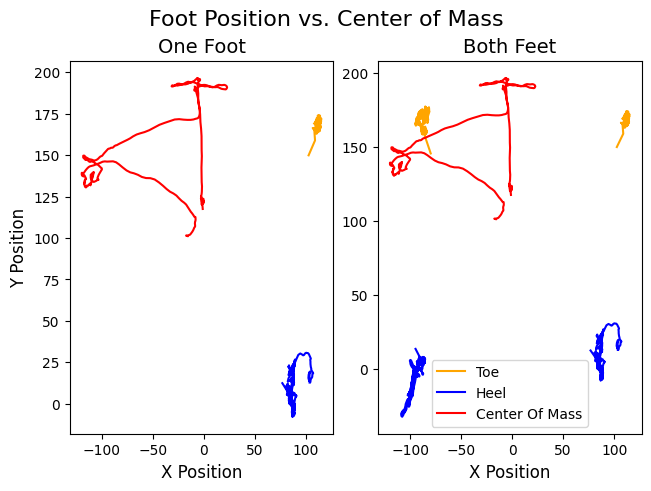

In [158]:
# Plots one vs two feet (can also use this to plot one vs two feet while holding a weight, just change the start frames accordingly)

startFrameOneFoot = 0
endFrameOneFoot = 1000
startFrameTwoFeet = 0
endFrameTwoFeet= 1000

#Change colors if desired
colors= ["red", "orange", "blue"]

plotOneVsTwoFeet(startFrameOneFoot, endFrameOneFoot, startFrameTwoFeet, endFrameTwoFeet, colors)